# Modelling with Gradient Boosting

## How Gradient Boosting Benefits an Art Auction Dataset

**Understanding Gradient Boosting:**
- **Sequential Learning:** Gradient boosting builds several small decision trees one after the other, each trying to fix the errors of the previous trees. This step-by-step improvement often leads to very accurate predictions.
- **Handles Complex Data:** Art auction data can include many factors (like artist, year, or style). Gradient boosting can capture the subtle, complex relationships between these features and auction prices.
- **Robust to Outliers:** This method can manage unusual data points (like extremely high or low auction prices), which is common in real-world auction datasets.

**Why Use Bootstrapping:**
- **Dealing with Limited Data:** When the dataset isn’t very large, it can be hard for a model to learn all the patterns. By bootstrapping it helps to create multiple versions of the dataset.
- **More Training Samples:** By sampling with replacement, bootstrapping gives the model more varied examples to learn from, improving its overall performance.
- **Increased Reliability:** This technique helps ensure that the model's predictions are more stable and less likely to be thrown off by a small amount of data.


In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Load data from CSV (using latin1 encoding)
df = pd.read_csv("auction_data_cleaned draft 1.2.csv", encoding="latin1")

# Remove rows with missing (null) values 
df = df.dropna()
print("Shape after dropping missing values:", df.shape)

# Use bootstrapping to increase the sample size by 5x
df = df.sample(n=len(df) * 5, replace=True, random_state=42)

# Select numeric columns for outlier detection and apply z-scores
# Filter the DataFrame: keep rows where the absolute Z-score of every numeric column is <= 3 to remove extreme values
numeric_cols = df.select_dtypes(include=["int", "float"]).columns
z_scores = df[numeric_cols].apply(zscore)
df = df[(z_scores.abs() <= 3).all(axis=1)]
print("Shape after dropping outliers:", df.shape)

# Use '-1' position as the target variable is the last column and the rest are features
# Drop the target variable, which is the final price in X to prevent overfitting
target_column = df.columns[-1]
X = df.drop(target_column, axis=1)
y = df[target_column]

# Convert text-based categorical columns into dummy variables
X = pd.get_dummies(X)

# Split the data equally into training and testing sets (50% each)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)

# Initialize and train the Gradient Boosting model with 100 estimators
# Set learning rate to 0.1 for gradual learning, thus, leading to a more robust model
# Set restrict tree depth to 3 to help prevent overfitting while still capturing useful patterns
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on both training and testing data
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

# Calculate R² scores to measure how well the model fits the data
train_r2_gb = r2_score(y_train, y_train_pred_gb)
test_r2_gb = r2_score(y_test, y_test_pred_gb)

# Calculate RMSE to quantify the prediction error
train_rmse_gb = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))
test_rmse_gb = np.sqrt(mean_squared_error(y_test, y_test_pred_gb))

print("Gradient Boosting Training R2:", round(train_r2_gb, 2))
print("Gradient Boosting Test R2:", round(test_r2_gb, 2))
print("Gradient Boosting Training RMSE:", round(train_rmse_gb, 2))
print("Gradient Boosting Test RMSE:", round(test_rmse_gb, 2))


Shape after dropping missing values: (199, 29)
Shape after dropping outliers: (866, 29)
Gradient Boosting Training R2: 0.94
Gradient Boosting Test R2: 0.92
Gradient Boosting Training RMSE: 3871.73
Gradient Boosting Test RMSE: 4909.37


## Feature Importance

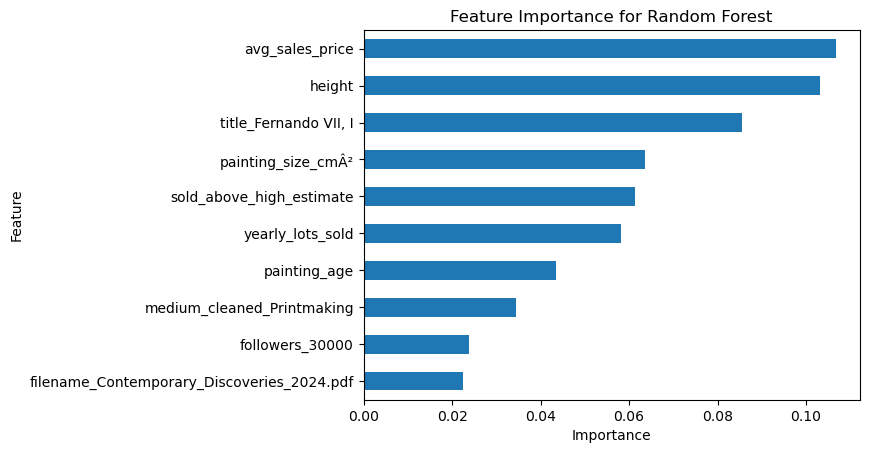

In [10]:
# Create a Pandas Series to map each feature to its importance as determined by the model
feat_importances = pd.Series(gb_model.feature_importances_, index=X.columns)

# Select the top 10 features based on their importance and plot them as a horizontal bar chart.
# The invert_yaxis() call ensures that the most important feature appears at the top.
feat_importances.nlargest(10).plot(kind='barh').invert_yaxis()

# Label the axis and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest')
plt.show()